In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# lay du lieu diabetes - du lieu ve benh tieu duong
diabetes = datasets.load_diabetes()
print("Số chiều dữ liệu input: ", diabetes.data.shape)
print("Kiểu dữ liệu input: ", type(diabetes.data))
print("Số chiều dữ liệu target: ", diabetes.target.shape)
print("Kiểu dữ liệu target: ", type(diabetes.target))
print()

print("5 mẫu dữ liệu đầu tiên:")
print("input: ", diabetes.data[:5])
print("target: ",diabetes.target[:5])
#print("data[5,1]", diabetes.data[4,1])

Số chiều dữ liệu input:  (442, 10)
Kiểu dữ liệu input:  <class 'numpy.ndarray'>
Số chiều dữ liệu target:  (442,)
Kiểu dữ liệu target:  <class 'numpy.ndarray'>

5 mẫu dữ liệu đầu tiên:
input:  [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
target:  [151.  75. 141. 206. 135.]


In [3]:
diabetes_X = diabetes.data

diabetes_X_train = diabetes_X[:361].T
diabetes_y_train = diabetes.target[:361].reshape(1,361)

diabetes_X_test = diabetes_X[362:].T
diabetes_y_test = diabetes.target[362:]
print(diabetes_X_train.shape, diabetes_y_train.shape, diabetes_X_test.shape, diabetes_y_test.shape)

(10, 361) (1, 361) (10, 80) (80,)


In [4]:
from my_dnn import model, optimizers, loss, metrics
my_model = model.SimpleDnn(layer_dims=[10, 20, 20, 10, 1], output_activation='relu')
# my_model.compile(optimizer = optimizers.Adam(), loss=loss.MSE(), metrics=metrics.MSE())

In [5]:
my_model.compile(optimizer = optimizers.Adam(), loss=loss.MSE(), metrics=metrics.MSE())

In [12]:
my_model.train(diabetes_X_train, diabetes_y_train, epochs=50, batch_size=64, verbose=1)

Epoch 0 Cost: 2584.232811635709 Eval: 2584.232811635709
Epoch 1 Cost: 2608.2827391216265 Eval: 2608.2827391216265
Epoch 2 Cost: 2595.880277009536 Eval: 2595.880277009536
Epoch 3 Cost: 2578.0446971163924 Eval: 2578.0446971163924
Epoch 4 Cost: 2586.7933667859556 Eval: 2586.7933667859556
Epoch 5 Cost: 2575.396714041946 Eval: 2575.396714041946
Epoch 6 Cost: 2583.951357541907 Eval: 2583.951357541907
Epoch 7 Cost: 2583.156893720813 Eval: 2583.156893720813
Epoch 8 Cost: 2575.543807754634 Eval: 2575.543807754634
Epoch 9 Cost: 2576.3511683823403 Eval: 2576.3511683823403
Epoch 10 Cost: 2562.843222402827 Eval: 2562.843222402827
Epoch 11 Cost: 2566.1105820549215 Eval: 2566.1105820549215
Epoch 12 Cost: 2555.1232663050223 Eval: 2555.1232663050223
Epoch 13 Cost: 2568.5383054943495 Eval: 2568.5383054943495
Epoch 14 Cost: 2552.4828365410785 Eval: 2552.4828365410785
Epoch 15 Cost: 2553.6817566911227 Eval: 2553.6817566911227
Epoch 16 Cost: 2542.2492665008685 Eval: 2542.2492665008685
Epoch 17 Cost: 2554.2

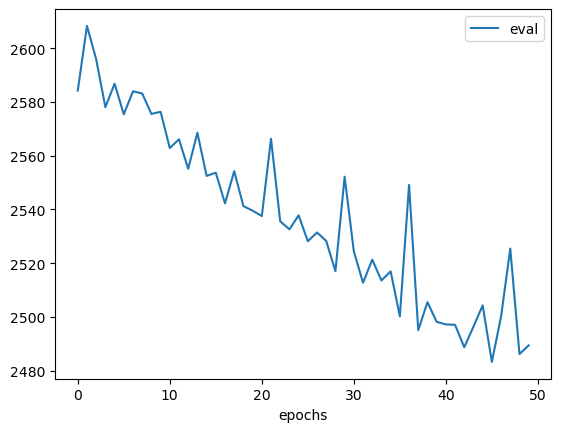

In [13]:
# plt.plot(np.squeeze(my_model.get_costs()), label='cost')
plt.plot(np.squeeze(my_model.get_evals()), label='eval')
plt.xlabel('epochs')
# plt.title("Learning rate =" + str(learning_rate))
plt.legend()
plt.show()

In [8]:
# my_model.save_weights('diabetes_weights.npz')
# del my_model
# my_model = model.SimpleDnn(layer_dims=[10, 20, 20, 10, 1], output_activation='linear')
# my_model.load_weights('diabetes_weights.npz')

In [14]:
##### exercise #####
# Yêu cầu: tính giá trị dự đoán của mô hình trên mẫu đầu tiên của tập test và so sánh với kết quả của thư viện
# Gợi ý: sử dụng công thức y = w0 + w1*x1 + w1*x2 + ... + w_n*x_n
######################
#Dự đoán thử cho trường hợp đầu tiên

#Giá trị đúng
print("Gia tri true: ", diabetes_y_test[0])

#Dự đoán cho mô hình Linear Regression sử dụng hàm dự đoán của thư viện
y_pred_linear = my_model.predict(diabetes_X_test[:, 0:1])
print("Gia tri du doan cho mô hình linear regression: ", y_pred_linear)

Gia tri true:  321.0
Gia tri du doan cho mô hình linear regression:  [[246.00213225]]


In [15]:
diabetes_y_pred = my_model.predict(diabetes_X_test)
diabetes_y_test = np.array(diabetes_y_test)
diabetes_y_pred = np.array(diabetes_y_pred).reshape(diabetes_y_test.shape)
pd.DataFrame(data=np.array([diabetes_y_test, diabetes_y_pred,
                            abs(diabetes_y_test - diabetes_y_pred)]).T,
             columns=["Thực tế", "Dự đoán", "Lệch"])

,Thực tế,Dự đoán,Lệch
0,321.0,246.002132,74.997868
1,58.0,148.367838,90.367838
2,262.0,149.924586,112.075414
3,206.0,159.758350,46.241650
4,233.0,258.486329,25.486329
...,...,...,...
75,178.0,199.843581,21.843581
76,104.0,84.033509,19.966491
77,132.0,113.642391,18.357609
78,220.0,193.538478,26.461522


In [16]:
math.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred))

54.713409515148896